In [2]:
# EE 154 - Lab 3 data analysis

import numpy as np
import matplotlib.pyplot as plt

# Load data
# Rows: 
# 1: Time (ms)
# 2: Thermistor reading (V)
# 3: Battery reading (V)
# 4: Accelerometer x (m/s^2)
# 5: Accelerometer y (m/s^2)
# 6: Accelerometer z (m/s^2)
# 7: Gyroscope x (rad/s)
# 8: Gyroscope y (rad/s)
# 9: Gyroscope z (rad/s)
# 10: Magnetometer x (uT)
# 11: Magnetometer y (uT)
# 12: Magnetometer z (uT)
# 13: Temperature (C)
# 14: Humidity (%)
# 15: Pressure (Pa)
data = np.loadtxt('ELLIE5.csv', delimiter=',')
time_ms = data[:,0]
therm = data[:,1]
battery = data[:,2]
accel_x = data[:,3]
accel_y = data[:,4]
accel_z = data[:,5]
gyro_x = data[:,6]
gyro_y = data[:,7]
gyro_z = data[:,8]
mag_x = data[:,9]
mag_y = data[:,10]
mag_z = data[:,11]
temp = data[:,12]
humidity = data[:,13]
pressure = data[:,14]

In [19]:
# Conversions

# Convert time to minutes
time_min = time_ms / 60000

# Convert thermistor reading to temperature
# Thermistor voltage divider
R1 = 4.7e3
Vcc = 3.3
# Thermistor resistance
Rt = R1 * (Vcc / therm - 1)
# Thermistor temperature
T0 = 25 + 273.15
B = 3950
R0 = 10e3
T = 1 / (1/T0 + 1/B * np.log(Rt/R0)) - 273.15

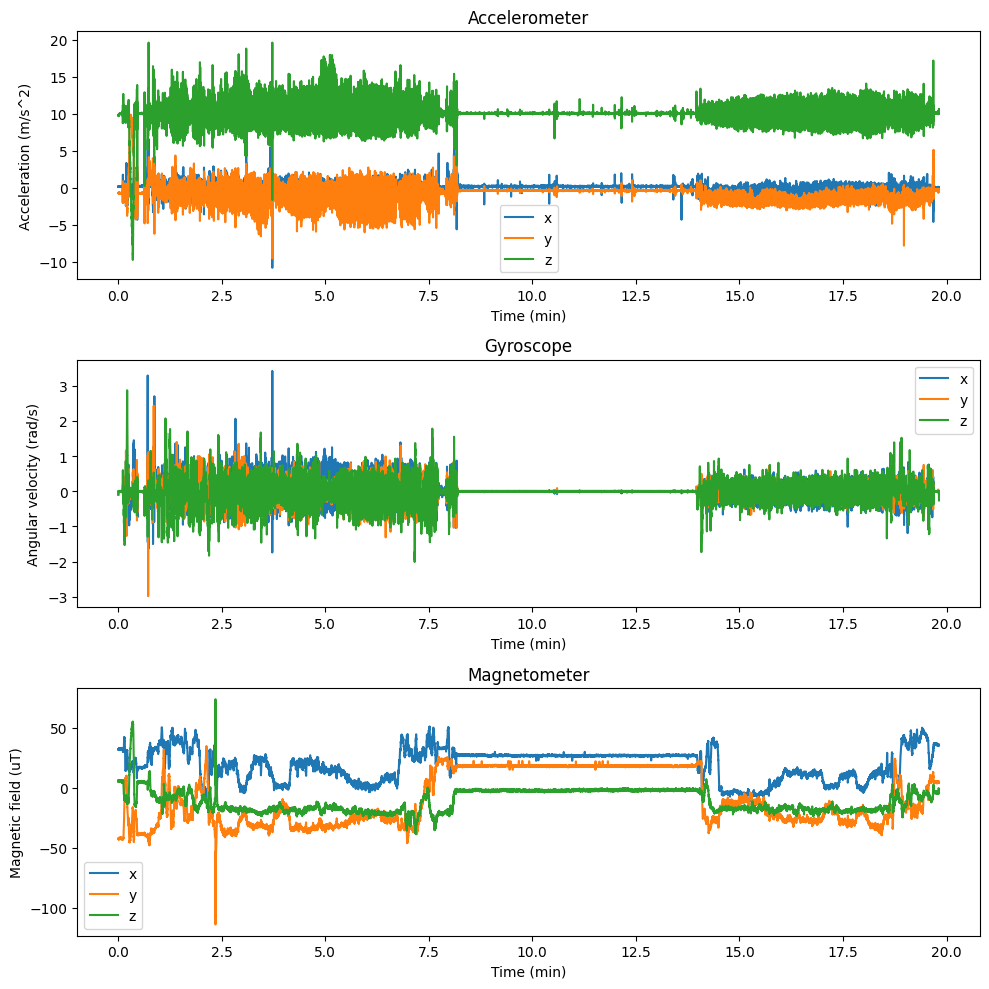

In [15]:
# Plot x, y, z accelerometer, gyroscope, and magnetometer data on one multiplot

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(time_min, accel_x, label='x')
ax[0].plot(time_min, accel_y, label='y')
ax[0].plot(time_min, accel_z, label='z')
ax[0].set_title('Accelerometer')
ax[0].set_xlabel('Time (min)')
ax[0].set_ylabel('Acceleration (m/s^2)')
ax[0].legend()

ax[1].plot(time_min, gyro_x, label='x')
ax[1].plot(time_min, gyro_y, label='y')
ax[1].plot(time_min, gyro_z, label='z')
ax[1].set_title('Gyroscope')
ax[1].set_xlabel('Time (min)')
ax[1].set_ylabel('Angular velocity (rad/s)')
ax[1].legend()

ax[2].plot(time_min, mag_x, label='x')
ax[2].plot(time_min, mag_y, label='y')
ax[2].plot(time_min, mag_z, label='z')
ax[2].set_title('Magnetometer')
ax[2].set_xlabel('Time (min)')
ax[2].set_ylabel('Magnetic field (uT)')
ax[2].legend()

plt.tight_layout()
plt.show()



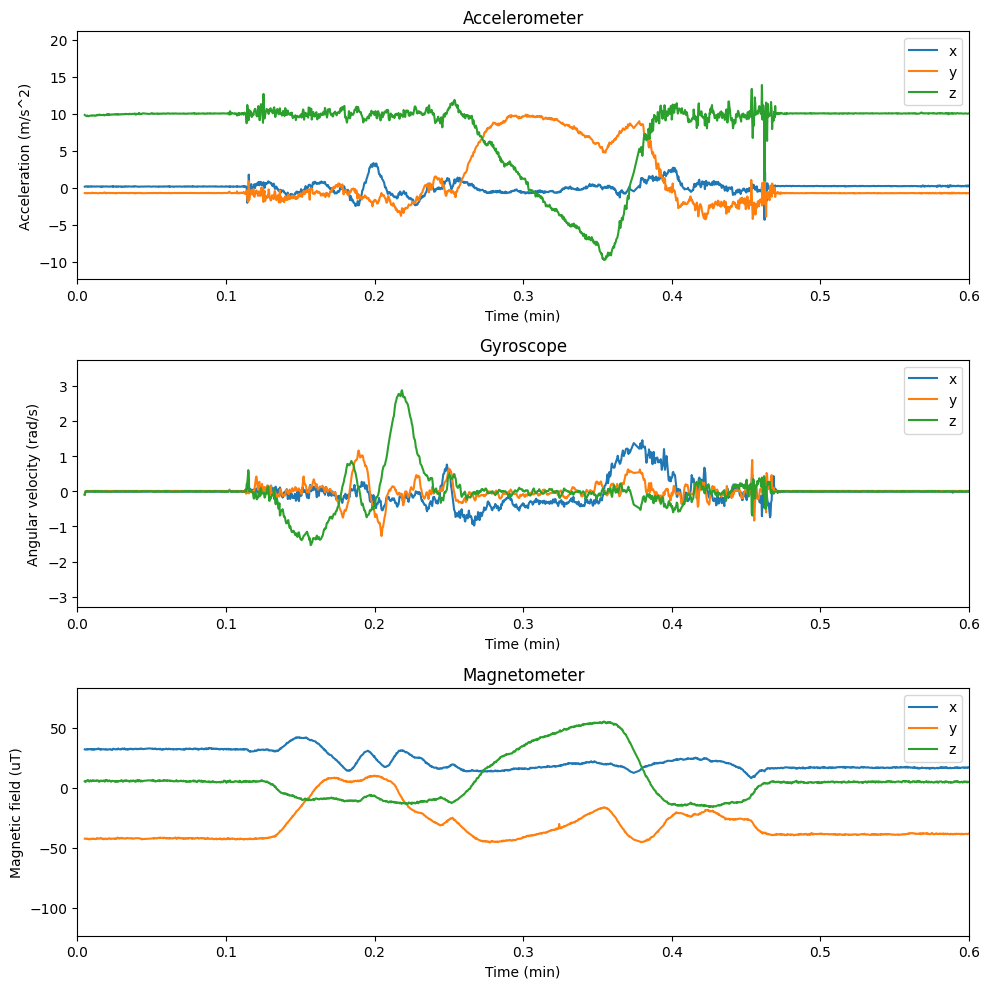

In [17]:
# Plot only the first two minutes (same multiplot)
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(time_min, accel_x, label='x')
ax[0].plot(time_min, accel_y, label='y')
ax[0].plot(time_min, accel_z, label='z')
ax[0].set_title('Accelerometer')
ax[0].set_xlabel('Time (min)')
ax[0].set_ylabel('Acceleration (m/s^2)')
ax[0].legend()
ax[0].set_xlim(0, 0.6)

ax[1].plot(time_min, gyro_x, label='x')
ax[1].plot(time_min, gyro_y, label='y')
ax[1].plot(time_min, gyro_z, label='z')
ax[1].set_title('Gyroscope')
ax[1].set_xlabel('Time (min)')
ax[1].set_ylabel('Angular velocity (rad/s)')
ax[1].legend()
ax[1].set_xlim(0, 0.6)

ax[2].plot(time_min, mag_x, label='x')
ax[2].plot(time_min, mag_y, label='y')
ax[2].plot(time_min, mag_z, label='z')
ax[2].set_title('Magnetometer')
ax[2].set_xlabel('Time (min)')
ax[2].set_ylabel('Magnetic field (uT)')
ax[2].legend()
ax[2].set_xlim(0, 0.6)

plt.tight_layout()
plt.show()



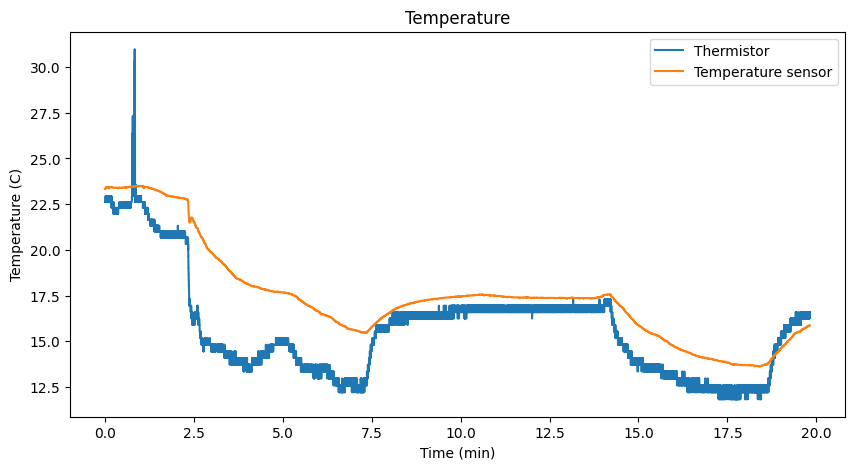

In [20]:
# Plot the temperature over time using both the thermistor and the temperature sensor (on a single plot is fine)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(time_min, T, label='Thermistor')
ax.plot(time_min, temp, label='Temperature sensor')
ax.set_title('Temperature')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Temperature (C)')
ax.legend()
plt.show()


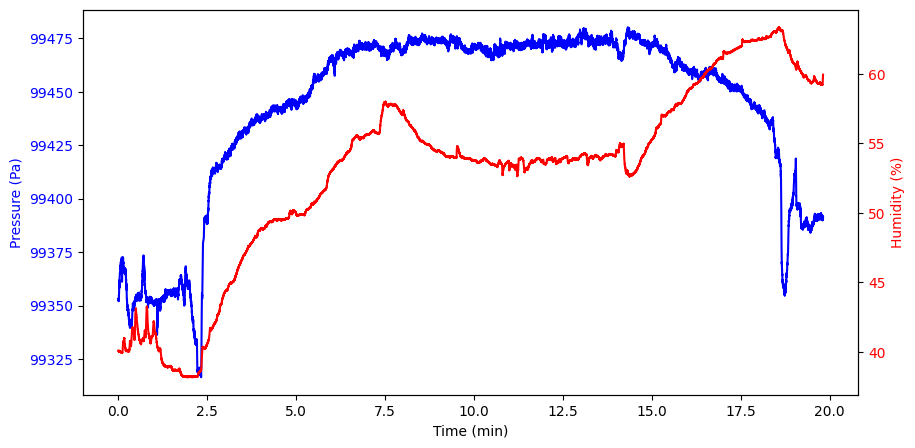

In [21]:
# Plot pressure and humidity over time (on a single plot with two vertical axis)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(time_min, pressure, label='Pressure', color='b')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Pressure (Pa)', color='b')
ax.tick_params(axis='y', labelcolor='b')

ax2 = ax.twinx()
ax2.plot(time_min, humidity, label='Humidity', color='r')
ax2.set_ylabel('Humidity (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.show()


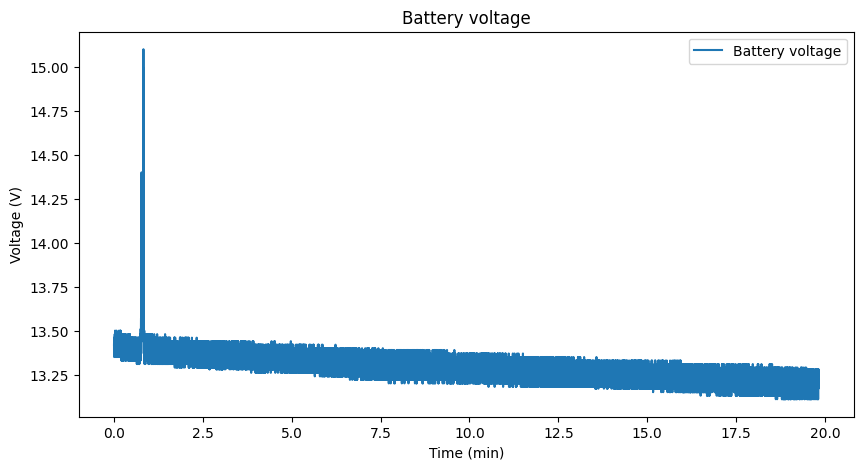

Initial battery voltage: 13.42
Final battery voltage: 13.2


In [23]:
# Plot battery voltage over time
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(time_min, battery, label='Battery voltage')
ax.set_title('Battery voltage')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Voltage (V)')
ax.legend()
plt.show()

# Print initial and final battery voltage
print('Initial battery voltage:', battery[0])
print('Final battery voltage:', battery[-1])



In [25]:
# Print average time between readings in ms
print('Average time between readings:', np.mean(np.diff(time_ms)))


Average time between readings: 21.126266216456372
